In [1]:
import os
from nltk import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from goose3 import Goose

In [9]:
g = Goose()
url = "https://olhardigital.com.br/2024/09/04/carros-e-tecnologia/hyundai-tera-carro-hibrido-que-parece-ter-saido-de-de-volta-para-o-futuro/"
url2 = "https://ge.globo.com/futebol/futebol-internacional/noticia/2024/09/04/bola-de-ouro-2024-veja-indicados-e-data-da-premiacao.ghtml"
artigo = g.extract(url2)

In [10]:
artigo.publish_date

'2024-09-04T16:26:08.913Z'

In [11]:
artigo.title

'Bola de Ouro 2024: Vini Jr é um dos indicados; veja lista de concorrentes'

In [12]:
artigo.meta_description

'Atacante do Real Madrid é o único brasileiro anunciado como um dos 30 candidatos, vencedores serão revelados em cerimônia no dia 28 de outubro, em Paris; veja lista com todas premiações'

In [13]:
artigo.links

['https://globoesporte.globo.com/equipe/futebol/futebol-internacional/futebol-ingles/manchester-city.html',
 'https://ge.globo.com/futebol/futebol-internacional/noticia/2024/09/04/bola-de-ouro-2024-veja-indicadas-no-feminino-e-data-da-premiacao.ghtml',
 'https://ge.globo.com/futebol/futebol-internacional/noticia/2024/09/04/bola-de-ouro-messi-e-cristiano-ronaldo-ficam-fora-da-lista-pela-1a-vez-desde-2003.ghtml',
 'https://ge.globo.com/futebol/futebol-internacional/noticia/2024/09/04/trofeu-kopa-veja-indicados-ao-premio-de-melhor-jovem-do-mundo.ghtml',
 'https://ge.globo.com/futebol/futebol-internacional/noticia/2024/09/04/trofeu-kopa-veja-indicados-ao-premio-de-melhor-jovem-do-mundo.ghtml',
 'https://ge.globo.com/futebol/futebol-internacional/noticia/2024/09/04/trofeu-yashin-ederson-e-alisson-ficam-fora-do-top-10-de-melhor-goleiro-do-mundo.ghtml',
 'https://ge.globo.com/futebol/futebol-internacional/liga-dos-campeoes/',
 'https://ge.globo.com/futebol/futebol-internacional/noticia/2024/0

In [14]:
artigo.cleaned_text

'A revista France Football revelou nesta quarta-feira os indicados à Bola de Ouro 2024, que premia os melhores da temporada 2023/24 na Europa. O atacante Vinicius Junior, do Real Madrid , é um dos favoritos ao prêmio . Ele é o único brasileiro a figurar na lista de 30 candidatos no masculino.\n\nA lista principal foi a última a ser divulgada. A primeira foi a do Troféu Kopa, voltada para o melhor jogador sub-21 na temporada. Savinho, destaque do Girona e atualmente no Manchester City, figura entre os indicados. Ex-Atlético-MG, o atacante brasileiro de 20 anos tem como principal concorrente Yamal, joia do Barcelona e campeão da Eurocopa com a Espanha.\n\nEm seguida, foi a vez do Troféu Yashin, para o melhor goleiro. Pela primeira vez não há brasileiros entre os atletas nomeados na categoria. A surpresa da lista é o sul-africano Ronwen Williams, campeão da Liga Africana com o Mamelodi Sundowns, da África do Sul. No páreo estão o ucraniano Lunin, vencedor da Champions League pelo Real Mad

In [23]:
word_tokens = word_tokenize(artigo.cleaned_text.lower())
word_tokens

['a',
 'revista',
 'france',
 'football',
 'revelou',
 'nesta',
 'quarta-feira',
 'os',
 'indicados',
 'à',
 'bola',
 'de',
 'ouro',
 '2024',
 ',',
 'que',
 'premia',
 'os',
 'melhores',
 'da',
 'temporada',
 '2023/24',
 'na',
 'europa',
 '.',
 'o',
 'atacante',
 'vinicius',
 'junior',
 ',',
 'do',
 'real',
 'madrid',
 ',',
 'é',
 'um',
 'dos',
 'favoritos',
 'ao',
 'prêmio',
 '.',
 'ele',
 'é',
 'o',
 'único',
 'brasileiro',
 'a',
 'figurar',
 'na',
 'lista',
 'de',
 '30',
 'candidatos',
 'no',
 'masculino',
 '.',
 'a',
 'lista',
 'principal',
 'foi',
 'a',
 'última',
 'a',
 'ser',
 'divulgada',
 '.',
 'a',
 'primeira',
 'foi',
 'a',
 'do',
 'troféu',
 'kopa',
 ',',
 'voltada',
 'para',
 'o',
 'melhor',
 'jogador',
 'sub-21',
 'na',
 'temporada',
 '.',
 'savinho',
 ',',
 'destaque',
 'do',
 'girona',
 'e',
 'atualmente',
 'no',
 'manchester',
 'city',
 ',',
 'figura',
 'entre',
 'os',
 'indicados',
 '.',
 'ex-atlético-mg',
 ',',
 'o',
 'atacante',
 'brasileiro',
 'de',
 '20',
 'anos',

In [24]:
len(word_tokens)

558

In [17]:
portuguese_stops = set(stopwords.words('portuguese'))

In [25]:
palavras = [palavra for palavra in word_tokens if palavra.lower() not in portuguese_stops]

In [26]:
len(palavras)

348

In [27]:
fdist = FreqDist(palavras)
fdist.most_common(10)

[(',', 45),
 ('.', 25),
 ('melhor', 8),
 ('troféu', 6),
 ('bola', 5),
 ('ouro', 5),
 ('lista', 5),
 ('france', 4),
 ('football', 4),
 ('temporada', 4)]

In [28]:
novas_palavras = [palavra for palavra in palavras if palavra.isalnum()]
len(novas_palavras)

264

In [29]:
fdist2 = FreqDist(novas_palavras)
fdist2.most_common(10)

[('melhor', 8),
 ('troféu', 6),
 ('bola', 5),
 ('ouro', 5),
 ('lista', 5),
 ('france', 4),
 ('football', 4),
 ('temporada', 4),
 ('jogador', 4),
 ('melhores', 3)]

In [30]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [31]:
wc = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color='salmon',
    colormap='Pastel1',
    collocations=False,
    stopwords=STOPWORDS
)
wc.generate(" ".join(novas_palavras))

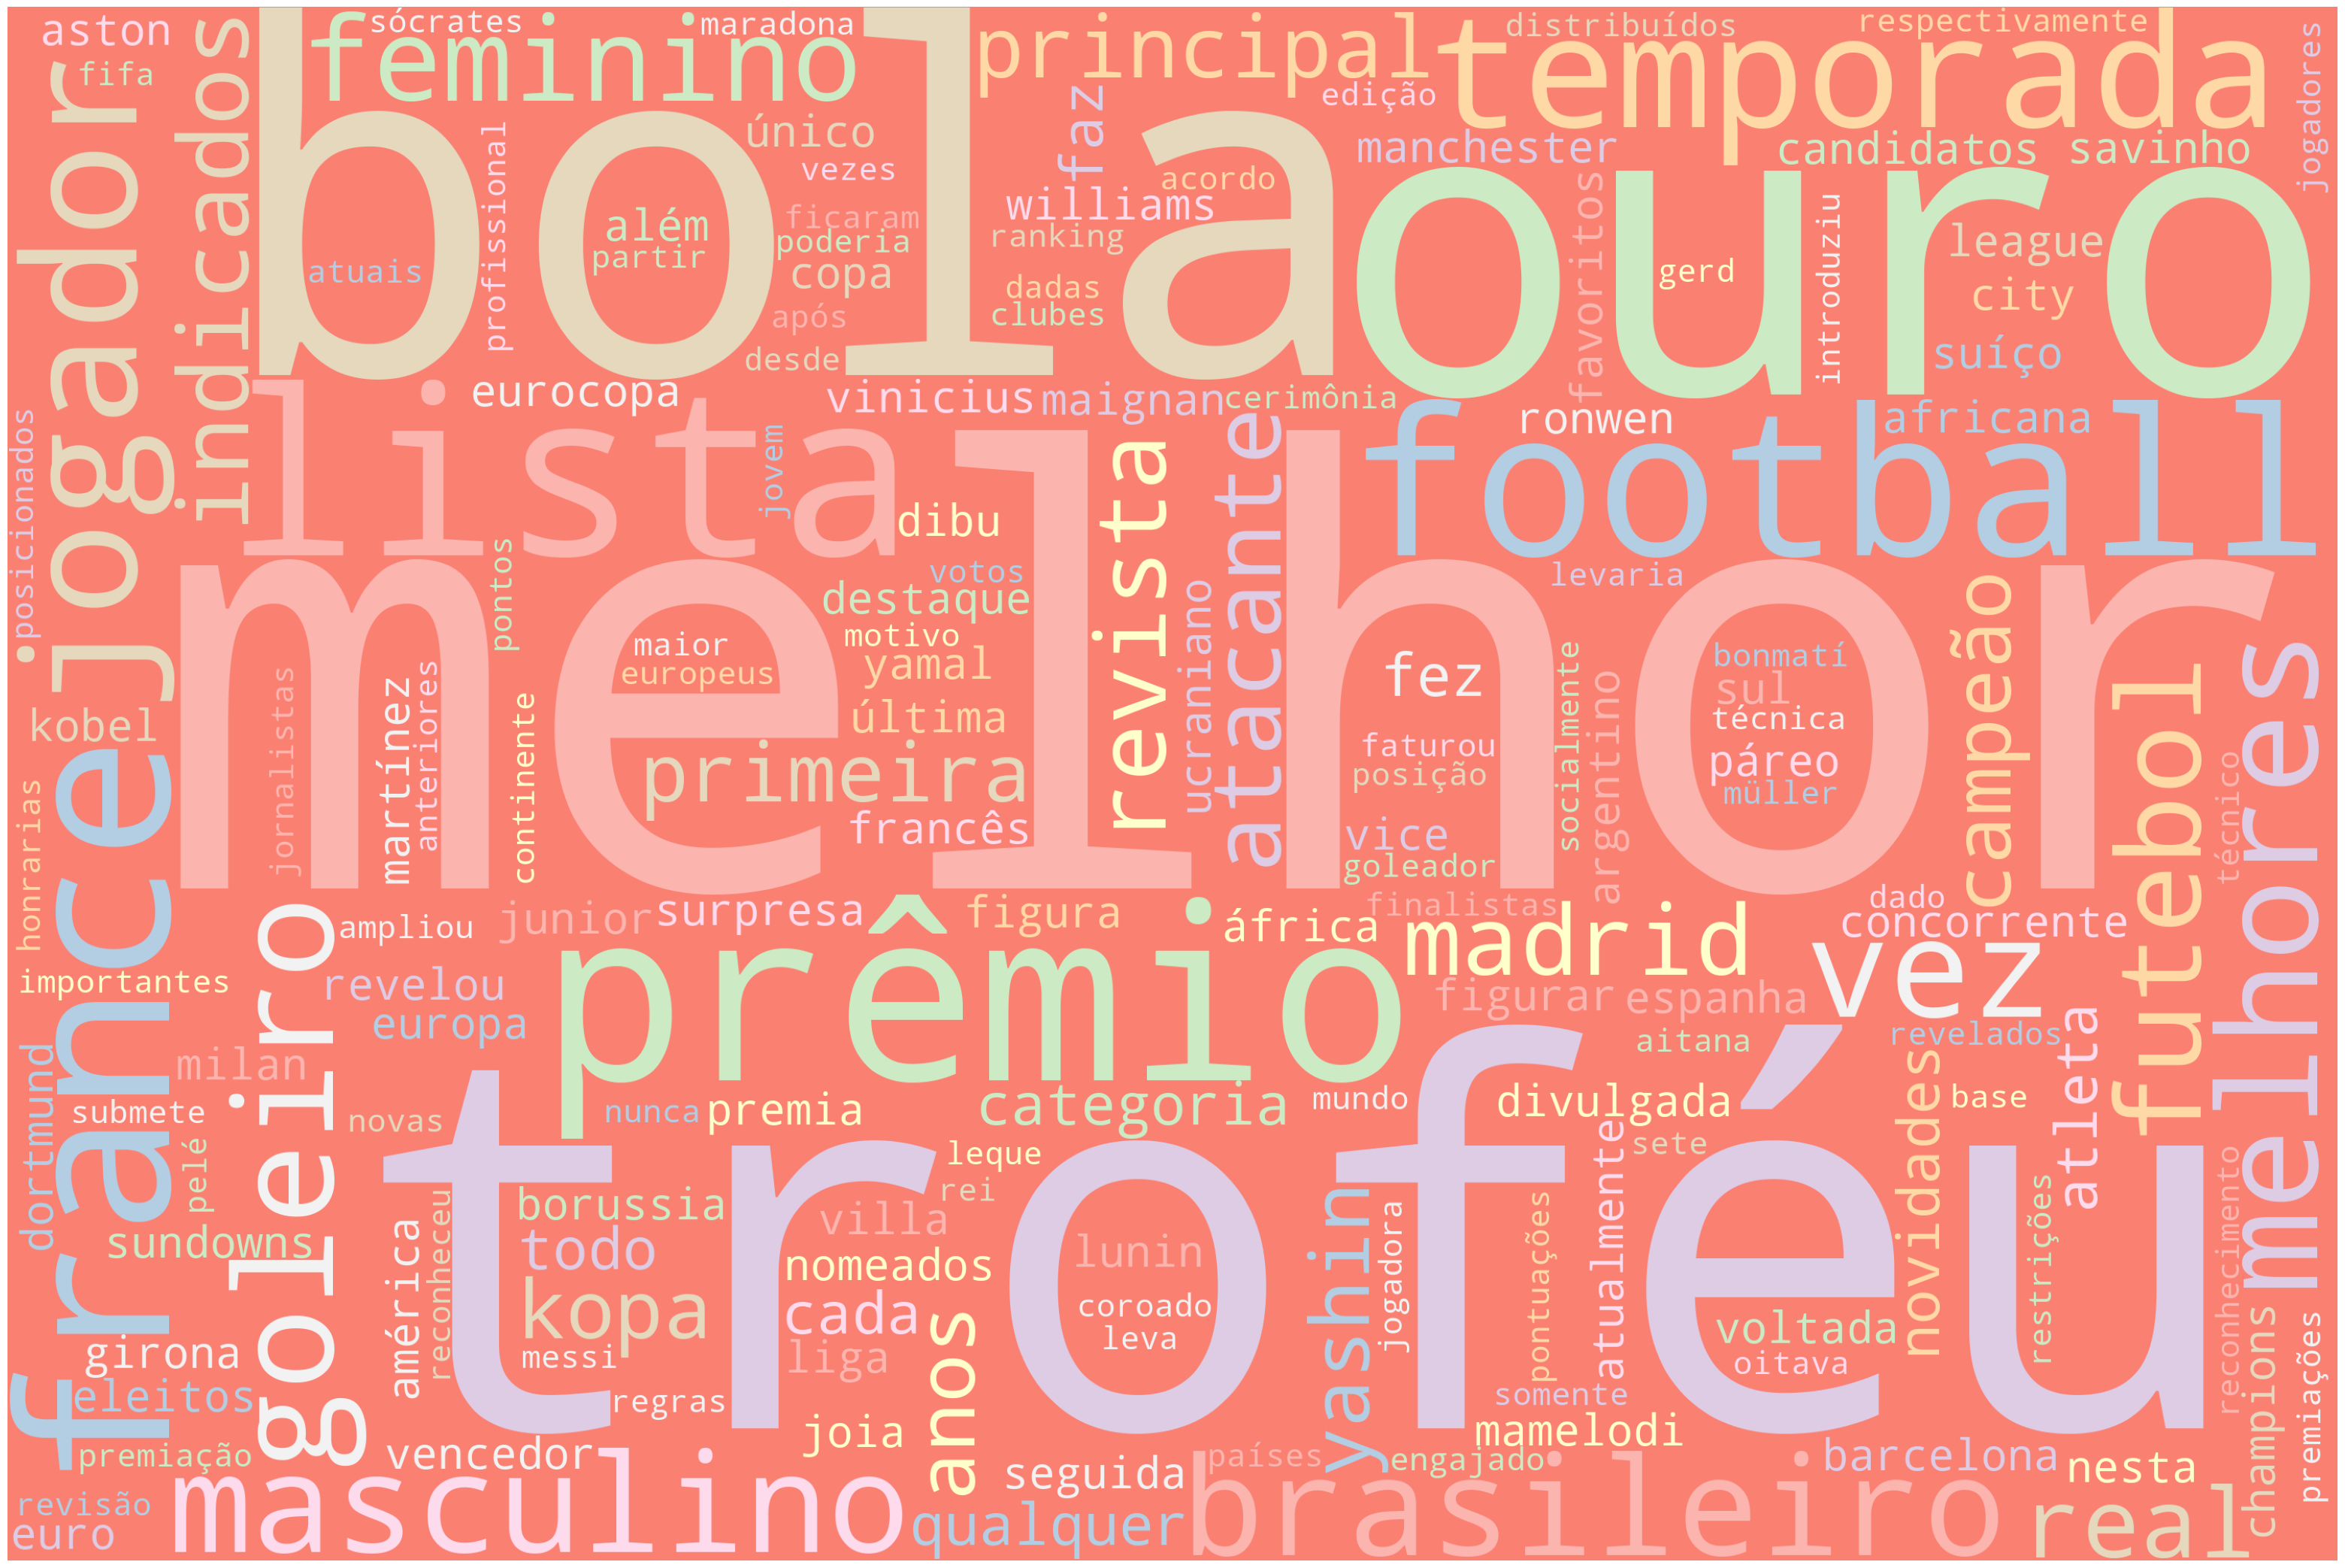

In [32]:
plot_cloud(wc)